In [4]:
import math

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
image = cv.imread("a.png")
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [6]:

def blured_img(img):
    blured_ima = cv.GaussianBlur(img,(5,5),0)
    plt.imshow(blured_ima, cmap="gray")
    return blured_ima

In [7]:
def edge_detection(blured_img):
    edges = cv.Canny(blured_img, 100, 200)
    plt.imshow(edges, cmap="gray")
    return edges

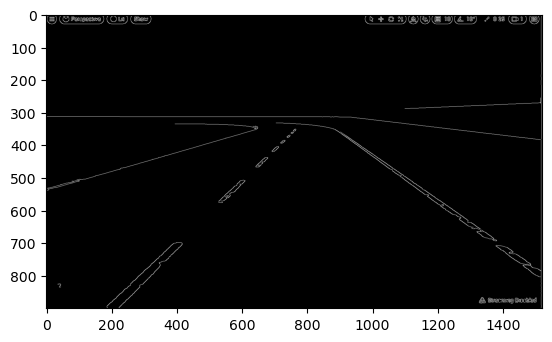

In [8]:
blured_img = blured_img(image)
edge_img = edge_detection(blured_img)

In [9]:
def hough_liness(org_img, edge_img):
    linesP = cv.HoughLinesP(edge_img, 1, np.pi / 180, 40, None, 20, 10)
    cdstP = cv.cvtColor(edge_img, cv.COLOR_GRAY2BGR)
    img = np.copy(org_img)
    if linesP is not None:
        for line in linesP:
            l = line[0] #x1,y1,x2,y2
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
        img = cv.addWeighted(org_img, 0.8, cdstP, 1.0, 0.0)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
        

In [10]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255 # This line altered for grayscale.
    
    cv.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv.bitwise_and(img, mask)
    return masked_image

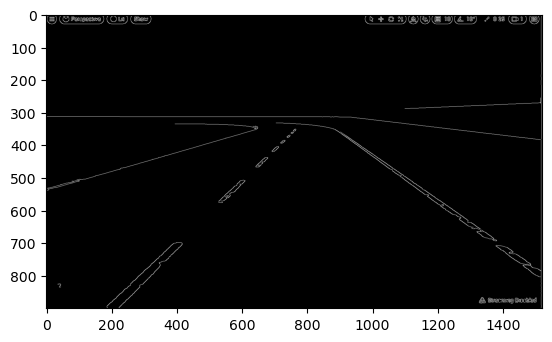

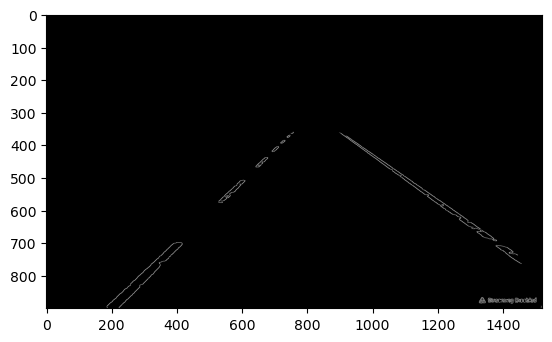

In [11]:
height, width = image.shape

region_of_interest_vertices = [
    (width / 1.7, height / 2.5),
    (width / 2, height / 2.5),
    (width / 6, height / 1.5),
    (0, height),
    (width, height),
    (width / 1.1, height / 1.5),
]

blr = cv.GaussianBlur(image,(5,5),0)
ed = edge_detection(blr)
cropped_image = region_of_interest(
    ed,
    np.array([region_of_interest_vertices], np.int32),
)
plt.figure()
plt.imshow(cropped_image, cmap='gray')
plt.show()

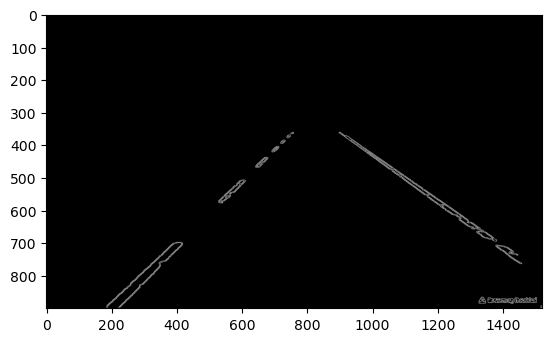

In [12]:

blured_img = cv.GaussianBlur(cropped_image,(5,5),0)
edge_pic = edge_detection(blured_img)

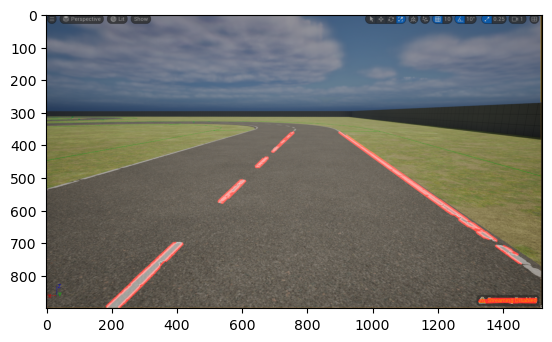

In [13]:
imagee = cv.imread("a.png")
hough_liness(imagee, edge_pic)